In [1]:
# this notebook preprocesses the data to feed it to a forcasting model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../data/COVID19_timeseries.csv")

In [4]:
data.head()

Id Province/State      Country   Lat  Long        Date  Infections  \
0   1           None  Afghanistan  33.0  65.0  2020-01-22         0.0   
1   2           None  Afghanistan  33.0  65.0  2020-01-23         0.0   
2   3           None  Afghanistan  33.0  65.0  2020-01-24         0.0   
3   4           None  Afghanistan  33.0  65.0  2020-01-25         0.0   
4   5           None  Afghanistan  33.0  65.0  2020-01-26         0.0   

   Fatalities Rank  Population  % of worldpopulation  \
0         0.0   43  32225560.0               0.00415   
1         0.0   43  32225560.0               0.00415   
2         0.0   43  32225560.0               0.00415   
3         0.0   43  32225560.0               0.00415   
4         0.0   43  32225560.0               0.00415   

                         Source  Age_0_to_14  Age_15_to_64  Age_over_65   Day  \
0  National annual estimate[42]        0.432         0.542        0.026  22.0   
1  National annual estimate[42]        0.432         0.542        0.026  23.0   
2  National annual estimate[42]        0.432         0.542        0.026  24.0   
3  National annual estimate[42]        0.432         0.542        0.026  25.0   
4  National annual estimate[42]        0.432         0.542        0.026  26.0   

   Month  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0

In [5]:
data.shape

(16128, 17)

In [6]:
# drop the Date, 'Source' and Id columns 
dates = data.Date
data = data.drop(['Date', 'Id', 'Source'], axis=1)

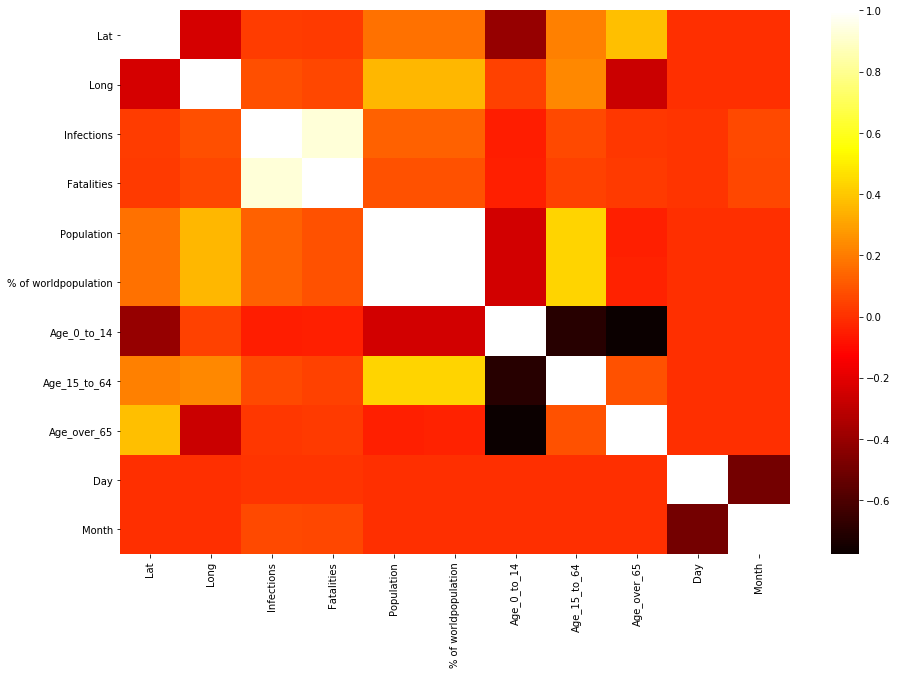

In [7]:
# visualize correlations between columns
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 10)
sns.heatmap(data.corr(), cmap='hot', ax=ax)

In [8]:
# 'Population' has perfect correlation with '% of worldpopulation', so drop it and rename the second one to the former
data = data.drop('Population', axis=1)
data = data.rename(columns={'% of worldpopulation': 'Population'})
data.head()

Province/State      Country   Lat  Long  Infections  Fatalities Rank  \
0           None  Afghanistan  33.0  65.0         0.0         0.0   43   
1           None  Afghanistan  33.0  65.0         0.0         0.0   43   
2           None  Afghanistan  33.0  65.0         0.0         0.0   43   
3           None  Afghanistan  33.0  65.0         0.0         0.0   43   
4           None  Afghanistan  33.0  65.0         0.0         0.0   43   

   Population  Age_0_to_14  Age_15_to_64  Age_over_65   Day  Month  
0     0.00415        0.432         0.542        0.026  22.0    1.0  
1     0.00415        0.432         0.542        0.026  23.0    1.0  
2     0.00415        0.432         0.542        0.026  24.0    1.0  
3     0.00415        0.432         0.542        0.026  25.0    1.0  
4     0.00415        0.432         0.542        0.026  26.0    1.0

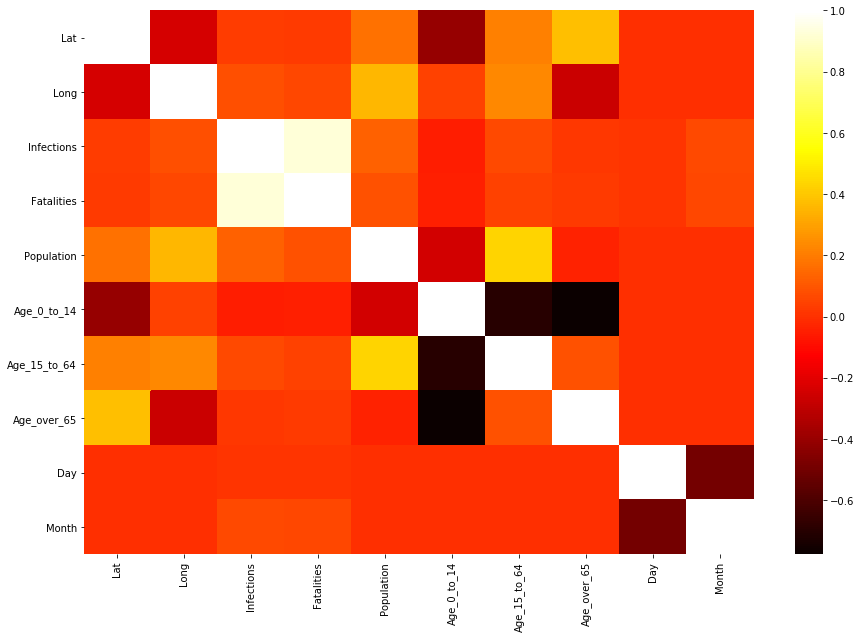

In [9]:
# visualize correlations between columns (again)
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 10)
sns.heatmap(data.corr(), cmap='hot', ax=ax)

In [10]:
# check if any missing values remain
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16128 entries, 0 to 16127
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  16128 non-null  object 
 1   Country         16128 non-null  object 
 2   Lat             16128 non-null  float64
 3   Long            16128 non-null  float64
 4   Infections      16128 non-null  float64
 5   Fatalities      16128 non-null  float64
 6   Rank            16128 non-null  object 
 7   Population      16128 non-null  float64
 8   Age_0_to_14     16128 non-null  float64
 9   Age_15_to_64    16128 non-null  float64
 10  Age_over_65     16128 non-null  float64
 11  Day             16128 non-null  float64
 12  Month           16128 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [11]:
# impute missing values
# TODO

In [12]:
# dummy encode the Province/State and remove the source column
data = pd.concat([data, pd.get_dummies(data['Province/State'])], axis=1).drop('Province/State', axis=1)

In [13]:
data.head()

Country   Lat  Long  Infections  Fatalities Rank  Population  \
0  Afghanistan  33.0  65.0         0.0         0.0   43     0.00415   
1  Afghanistan  33.0  65.0         0.0         0.0   43     0.00415   
2  Afghanistan  33.0  65.0         0.0         0.0   43     0.00415   
3  Afghanistan  33.0  65.0         0.0         0.0   43     0.00415   
4  Afghanistan  33.0  65.0         0.0         0.0   43     0.00415   

   Age_0_to_14  Age_15_to_64  Age_over_65  ...  Virgin Islands  Virginia  \
0        0.432         0.542        0.026  ...               0         0   
1        0.432         0.542        0.026  ...               0         0   
2        0.432         0.542        0.026  ...               0         0   
3        0.432         0.542        0.026  ...               0         0   
4        0.432         0.542        0.026  ...               0         0   

   Washington  West Virginia  Western Australia  Wisconsin  Wyoming  Xinjiang  \
0           0              0                  0          0        0         0   
1           0              0                  0          0        0         0   
2           0              0                  0          0        0         0   
3           0              0                  0          0        0         0   
4           0              0                  0          0        0         0   

   Yunnan  Zhejiang  
0       0         0  
1       0         0  
2       0         0  
3       0         0  
4       0         0  

[5 rows x 141 columns]

In [14]:
data.to_csv("../data/COVID19_timeseries_processed.csv", index=None)

In [15]:
data.shape

(16128, 141)